### Important Library

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

###Importing Training and Test Dataset

In [2]:
training_data = pd.read_excel('Data_Train.xlsx')
test_data = pd.read_excel('Test_set.xlsx')

In [3]:
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
## Checking the size of the Dataset

print("Rows in training dataset: " + str(training_data.shape[0]))
print("Columns in training dataset: " + str(training_data.shape[1]))
print("==================================")
print("Rows in test dataset: " + str(test_data.shape[0]))
print("Columns in test dataset: " + str(test_data.shape[1]))

Rows in training dataset: 10683
Columns in training dataset: 11
Rows in test dataset: 2671
Columns in test dataset: 10


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### Checking Missing values in dataset

In [7]:
## Cheching the missing Value in training data
training_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
## Cheching the missing Value in test data
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [9]:
### Checking Datatpyes in dataset

In [10]:
training_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

##### Training Data
Numerical column: 1

Categorical calumn: 10

##### Test Data
Numerical column: 0

Categorical calumn: 10



### Handling the missing value

In [12]:
training_data.dropna(inplace=True)

In [13]:
training_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Changing the datatype of Date_of_journey, Arrival_time, Dep_time.
We will add some new column and remove unnecessary column from database

In [15]:
#Changing Data type of "Date_of_Journey" column into datetime
training_data["Date_of_Journey"] = pd.to_datetime(training_data.Date_of_Journey, format = "%d/%m/%Y")

#Changing Data type of "Arrival_Time" column into datetime
training_data["Arrival_Time"] = pd.to_datetime(training_data.Arrival_Time)

#Changing Data type of "Dep_Time" column into datetime
training_data["Dep_Time"] = pd.to_datetime(training_data.Dep_Time)
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-01 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-01 05:50:00,2022-07-01 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-01 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2022-07-01 18:05:00,2022-07-01 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2022-07-01 16:50:00,2022-07-01 21:35:00,4h 45m,1 stop,No info,13302


In [16]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [17]:
# Adding two new column

#extracting day from "Date_of_Journey"
training_data["Journey_day"] = training_data["Date_of_Journey"].dt.day

#extracting month from "Date_of_Journey"
training_data["Journey_month"] = training_data["Date_of_Journey"].dt.month

#extracting Arrival_hour and Arrival_min from Arrival_Time Column
training_data['Arrival_hour'] = training_data['Arrival_Time'].dt.hour
training_data['Arrival_min'] = training_data['Arrival_Time'].dt.minute

training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-01 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-01 05:50:00,2022-07-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-01 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2022-07-01 18:05:00,2022-07-01 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2022-07-01 16:50:00,2022-07-01 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [18]:
## Now dropping Arrival Time

training_data.drop('Arrival_Time', axis=1, inplace=True)
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-01 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-01 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-01 09:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2022-07-01 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2022-07-01 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [19]:
### Extracting Dep_hour, Dep_min from Dep_time from Dep_Time

training_data['Dep_hour'] = training_data['Dep_Time'].dt.hour
training_data['Dep_min'] = training_data['Dep_Time'].dt.minute

training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-01 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-01 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-01 09:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2022-07-01 18:05:00,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2022-07-01 16:50:00,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [20]:
## Dropping the column Dep_Time

training_data.drop('Dep_Time', axis=1, inplace=True)
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50


In [21]:
duration = list(training_data['Duration'])
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [22]:
minutes = []
for i in range(len(duration)):
        # print(duration[i].split('h')[0])
        if (len(duration[i].split()) != 2):
            if "h" in duration[i]:
                minutes.append(int(duration[i].split('h')[0]) * 60)
#                 print(int(duration[i].split('h')[0]) * 60)
            else:
                minutes.append(int(duration[i].split()[0].split(sep='m')[0]))
#                 print(int(duration[i].split()[0].split(sep='m')[0]))
        else:
            minutes.append(int(duration[i].split('h')[0])* 60 + int(duration[i].split()[1].split('m')[0]))
#             print( int(duration[i].split('h')[0])* 60 + int(duration[i].split()[1].split('m')[0]) )
# print(minutes)
print(minutes)

[170, 445, 1140, 325, 285, 145, 930, 1265, 1530, 470, 795, 155, 135, 730, 155, 1595, 270, 1355, 1380, 1235, 310, 920, 170, 175, 800, 910, 345, 355, 170, 135, 135, 805, 170, 1320, 330, 625, 315, 150, 375, 715, 665, 510, 1325, 165, 720, 170, 170, 135, 965, 1195, 195, 1520, 170, 180, 170, 975, 905, 135, 390, 1505, 745, 1640, 615, 630, 135, 625, 170, 90, 800, 135, 85, 1590, 440, 810, 300, 165, 170, 90, 1145, 135, 890, 160, 1330, 575, 600, 1280, 325, 1125, 740, 1080, 555, 665, 1050, 800, 155, 145, 160, 180, 85, 995, 740, 735, 450, 1440, 165, 535, 430, 870, 1820, 1195, 900, 175, 765, 610, 355, 925, 965, 610, 160, 715, 160, 85, 845, 1215, 145, 1390, 1090, 960, 170, 140, 480, 1015, 190, 165, 840, 1430, 1300, 1275, 165, 650, 480, 495, 325, 515, 710, 1655, 505, 1255, 290, 490, 140, 1465, 170, 740, 735, 1415, 995, 170, 1545, 1570, 1730, 165, 1515, 560, 270, 925, 90, 160, 550, 165, 1355, 185, 690, 570, 730, 1055, 305, 1550, 1200, 780, 1105, 90, 570, 960, 140, 270, 345, 1450, 155, 165, 295, 1535, 3

In [23]:
training_data['Duration_mins'] = minutes
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,35,16,50,285


In [24]:
training_data.drop('Duration', axis=1, inplace=True)

In [25]:
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,285


In [26]:
training_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [27]:
Airline = training_data[['Airline']]

In [28]:
Airline.head()

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo


In [29]:
Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
# As we can see Source and Destinations are Nominal categorical data so we have to convert in into numerical using
# hot encoding

Source = pd.get_dummies(training_data['Source'], drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
Destination = pd.get_dummies(training_data['Destination'], drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
## Additional Info contains no info
## Route and Total Steps are same 
training_data.drop(['Route', 'Additional_Info'], inplace=True, axis=1)

In [33]:
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,non-stop,3897,24,3,1,10,22,20,170
1,Air India,2019-05-01,Kolkata,Banglore,2 stops,7662,1,5,13,15,5,50,445
2,Jet Airways,2019-06-09,Delhi,Cochin,2 stops,13882,9,6,4,25,9,25,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,1 stop,6218,12,5,23,30,18,5,325
4,IndiGo,2019-03-01,Banglore,New Delhi,1 stop,13302,1,3,21,35,16,50,285


In [34]:
training_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
## As we can see this is ordinal categorical type of data, we use LabelENcoding

training_data['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops':4}, inplace=True)

In [36]:
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,0,3897,24,3,1,10,22,20,170
1,Air India,2019-05-01,Kolkata,Banglore,2,7662,1,5,13,15,5,50,445
2,Jet Airways,2019-06-09,Delhi,Cochin,2,13882,9,6,4,25,9,25,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,1,6218,12,5,23,30,18,5,325
4,IndiGo,2019-03-01,Banglore,New Delhi,1,13302,1,3,21,35,16,50,285


In [37]:
training_data = pd.concat([training_data,Source,Destination,Airline], axis=1)
training_data.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,IndiGo,2019-03-24,Banglore,New Delhi,0,3897,24,3,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,2,7662,1,5,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,2,13882,9,6,4,25,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,1,6218,12,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,1,13302,1,3,21,35,...,0,1,0,0,0,0,0,0,0,0


In [38]:
## Drop some column

training_data.drop(['Source', 'Destination', 'Airline'], axis=1, inplace=True)
training_data.head()

,Date_of_Journey,Total_Stops,Price,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,2019-03-24,0,3897,24,3,1,10,22,20,170,...,0,1,0,0,0,0,0,0,0,0
1,2019-05-01,2,7662,1,5,13,15,5,50,445,...,0,0,0,0,0,0,0,0,0,0
2,2019-06-09,2,13882,9,6,4,25,9,25,1140,...,0,0,1,0,0,0,0,0,0,0
3,2019-05-12,1,6218,12,5,23,30,18,5,325,...,0,1,0,0,0,0,0,0,0,0
4,2019-03-01,1,13302,1,3,21,35,16,50,285,...,0,1,0,0,0,0,0,0,0,0


In [39]:
training_data.shape

(10682, 30)

### Test Data

In [40]:
test_data = pd.read_excel('Test_set.xlsx')

In [41]:
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [42]:
print("Airline:")

test_Airline = test_data[['Airline']]
# Airline are ordinal categorical data so we perform label encoding
test_Airline = pd.get_dummies(test_Airline, drop_first=True)
test_Airline.head(2)

Airline:


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0


In [43]:
print("Source:")

test_Source = test_data[['Source']]
# Source are ordinal categorical data so we perform label encoding
test_Source = pd.get_dummies(test_Source, drop_first=True)
test_Source.head(2)



Source:


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0


In [44]:
print("Destination:")

test_Destination = test_data[['Destination']]
# Source are ordinal categorical data so we perform label encoding
test_Destination = pd.get_dummies(test_Destination, drop_first=True)
test_Destination.head(2)

Destination:


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0


In [45]:
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [46]:
test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey']).dt.day
test_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5


In [47]:
print("Date_of_Journey:")

## convert Date_of_Journey into Journey_day and Journey_month

test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey']).dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey']).dt.month
test_data.drop('Date_of_Journey', axis=1, inplace=True)
test_data.head(2)

Date_of_Journey:


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12


In [48]:
## create 2 new column for Arrival_hour and Arrical_min from Arrival_Time column
test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_min'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop('Arrival_Time', axis=1, inplace=True)


In [49]:
## Create Dep_hour and Dep_min and extract information from Dep_time

test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute
test_data.drop('Dep_Time', axis=1, inplace=True)

In [50]:
test_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,10,20,6,20


In [51]:
## Now convert duration to total minutes

test_duration = test_data['Duration']

minutes = []
for i in range(len(test_duration)):
        # print(duration[i].split('h')[0])
        if (len(test_duration[i].split()) != 2):
            if "h" in test_duration[i]:
                minutes.append(int(test_duration[i].split('h')[0]) * 60)
#                 print(int(duration[i].split('h')[0]) * 60)
            else:
                minutes.append(int(test_duration[i].split()[0].split(sep='m')[0]))
#                 print(int(duration[i].split()[0].split(sep='m')[0]))
        else:
            minutes.append(int(test_duration[i].split('h')[0])* 60 + int(test_duration[i].split()[1].split('m')[0]))
#             print( int(duration[i].split('h')[0])* 60 + int(duration[i].split()[1].split('m')[0]) )
# print(minutes)
# print(minutes)

test_data['Duration_min'] = minutes

test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55,170


In [52]:
test_data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,25,17,30,655
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,10,20,6,20,240
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,0,19,15,1425
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,21,0,8,0,780
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2,45,23,55,170


In [53]:
test_data = pd.concat([test_data, test_Airline, test_duration,test_Source,test_Destination], axis=1)

In [54]:
test_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Arrival_hour,...,Duration,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,4,...,10h 55m,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,10,...,4h,0,0,1,0,0,0,0,0,0


In [55]:
test_data.columns.shape

(34,)

In [56]:
test_data.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Duration', 'Route'], axis=1, inplace=True)
test_data.head(2)

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1 stop,6,6,4,25,17,30,655,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1 stop,5,12,10,20,6,20,240,0,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
training_data.shape

(10682, 30)

In [58]:
training_data.columns

Index(['Date_of_Journey', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Duration_mins', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy'],
      dtype='object')

In [59]:
X = training_data.loc[:,['Total_Stops','Journey_day',
       'Journey_month', 'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Duration_mins', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Cochin',
       'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy']]
X.head(2)

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_mins,Chennai,Delhi,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,24,3,1,10,22,20,170,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1,5,13,15,5,50,445,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
y= training_data.iloc[:,2]
y.head(5)

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

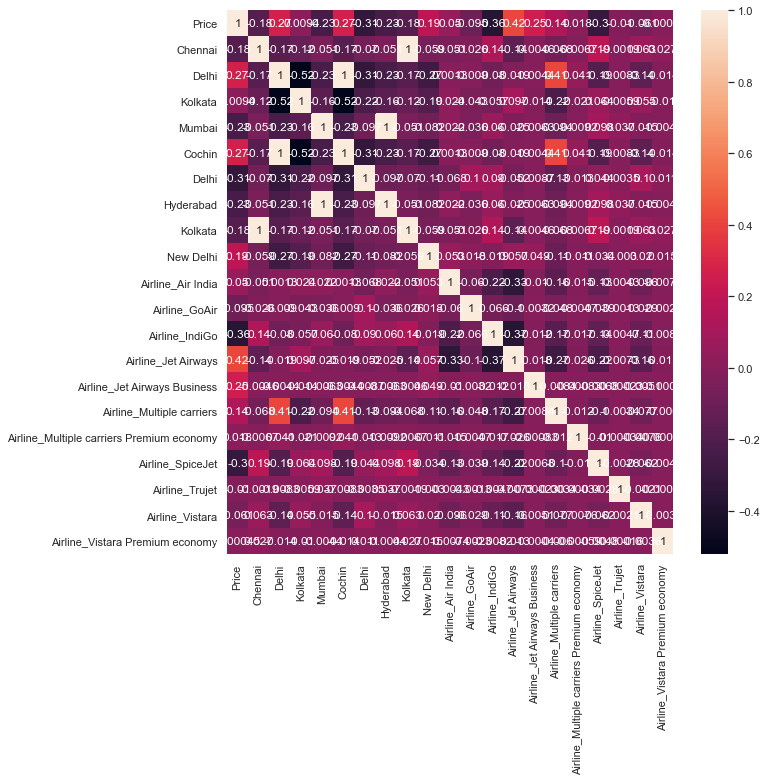

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(training_data.drop(['Total_Stops','Journey_day',
       'Journey_month', 'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
       'Duration_mins'], axis=1).corr(), annot=True)

In [62]:
from sklearn.model_selection import train_test_split


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [66]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
y_pred = rf_reg.predict(X_test)
y_pred

array([16781.32      ,  5512.49      ,  8953.77      , ...,
        6606.68      , 12863.50166667, 12973.80833333])

In [68]:
rf_reg.score(X_train, y_train)

0.952089065141928

In [69]:
rf_reg.score(X_test, y_test)

0.823190415753541

In [70]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.823190415753541

In [76]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_depth = [int(i) for i in np.linspace(start=5, stop=30, num=6)]
max_features = ['auto', 'sqrt']
# min samples required for split a node
min_samples_split =[2,5,10,15,100]
# min damples is required for each leaf node
min_samples_leaf=[1,2,5,10]

parameter_distributions = {
    'max_depth': max_depth,
    'max_features': max_features,
    'n_estimators': n_estimators,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [81]:
rf_randomized = RandomizedSearchCV(estimator=rf_reg,scoring='neg_mean_squared_error', param_distributions=parameter_distributions, cv=5, verbose=2, n_jobs=1, n_iter=10, random_state=42)

In [82]:
rf_randomized.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [83]:
rf_randomized.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [84]:
prediction = rf_randomized.predict(X_test)

In [85]:
prediction

array([16718.90703368,  5539.22339293,  8619.60656087, ...,
        6806.85491893, 12190.67910601, 12426.58459301])

In [88]:
print("MAE: ", metrics.mean_absolute_error(y_test, prediction))
print("MSE: ", metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  1144.3948401443627
MSE:  3530575.7122337595
RMSE:  1878.9826269111056


In [90]:
## Save the model to reuse it again
import pickle
file = open('flight_rf', 'wb')

## dump information to that file

pickle.dump(rf_reg, file)